Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [143]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
#data import
yelp = pd.read_csv('yelp_labelled.txt', sep="\t", header=None)

yelp.columns = ['message','sentiment']
print(yelp)

                                               message  sentiment
0                             Wow... Loved this place.          1
1                                   Crust is not good.          0
2            Not tasty and the texture was just nasty.          0
3    Stopped by during the late May bank holiday of...          1
4    The selection on the menu was great and so wer...          1
5       Now I am getting angry and I want my damn pho.          0
6                Honeslty it didn't taste THAT fresh.)          0
7    The potatoes were like rubber and you could te...          0
8                            The fries were great too.          1
9                                       A great touch.          1
10                            Service was very prompt.          1
11                                  Would not go back.          0
12   The cashier had no care what so ever on what I...          0
13   I tried the Cape Cod ravoli, chicken,with cran...          1
14   I was

In [149]:
pos_keywords = ['loved', 'great', 'delicious', 
                'beautiful', 'fresh', 'perfect',
                'good', 'visit', 'quick',
                 'affordable', 'wonderful', 'very']

neg_keywords = ['bad', 'terrible', 'ignored', 
                'wrong', 'cold', 
                'dry', 'slow', 'pricey']

for key in pos_keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp[str(key)] = yelp.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
#yelp['allcaps'] = yelp.message.str.isupper()

In [150]:
yelp_pos = yelp[yelp['sentiment'] == 1]
yelp_neg = yelp[yelp['sentiment'] == 0]

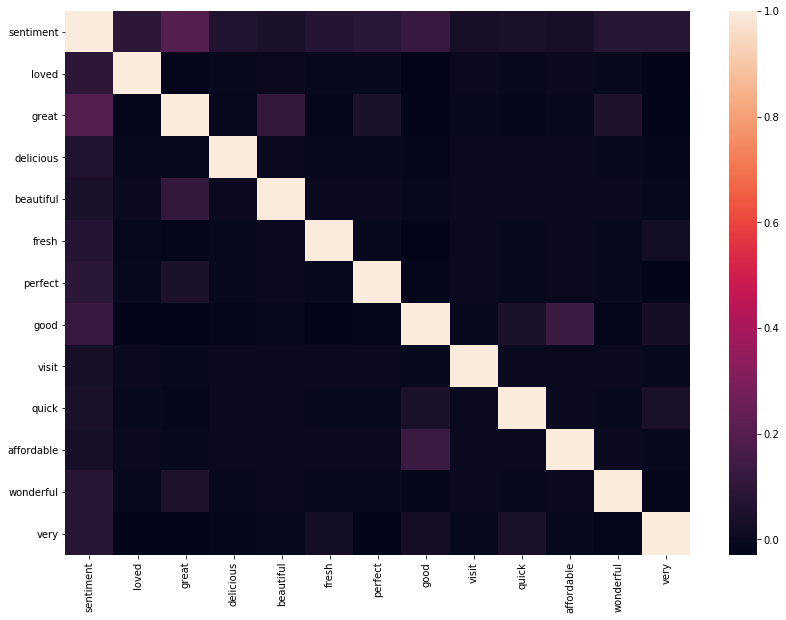

In [151]:
plt.figure(figsize=(14,10))
sns.heatmap(yelp.corr())
#print(yelp.head())

In [153]:
data = yelp[pos_keywords]
target = yelp['sentiment']

In [155]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
accuracy = (target != y_pred).sum()/(data.shape[0]/2)*100
print("Accuracy of this model: {}%".format(round(accuracy,1)))

Number of mislabeled points out of a total 1000 points : 387
Accuracy of this model: 77.4%
